<a href="https://colab.research.google.com/github/Chri1629/dsim_project/blob/main/image_retrieval/retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

In [ ]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing import image as kimage
from tensorflow.keras.applications import xception
import tarfile
from shutil import copyfile
from time import time
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
net = xception.Xception(include_top = False, weights = 'imagenet', pooling = 'max', input_shape = (224,224,3))

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
img = kimage.load_img('gdrive/MyDrive/single/test/taxi.jpg', target_size = (224,224))

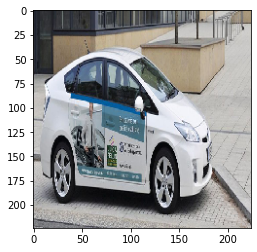

In [ ]:
plt.imshow(img)

In [ ]:
x = kimage.img_to_array(img)

In [ ]:
x = xception.preprocess_input(x)

In [ ]:
x = np.expand_dims(x, axis = 0)

In [ ]:
features = net.predict(x)
features.shape

(1, 2048)

In [ ]:
features = features.flatten()
features.shape

(2048,)

In [ ]:
maximages = 500

# Dummy feature
def identity(image):
    return kimage.img_to_array(img).flatten()

# Data loader
def load_data(feature_extractor=identity):
    base_path = "gdrive/MyDrive/ambulanze/"

    paths = []
    features = []

    for fi,f in enumerate(sorted(os.listdir(base_path))):
        if f.endswith('.jpg') and fi<maximages:
            # Save file path
            cur_path = base_path + f
            paths.append(cur_path)
            
            # Load file and extract features
            image = kimage.load_img(cur_path, target_size=(224, 224))
            cur_features = feature_extractor(image)
            features.append(cur_features)

    features = np.array(features)
    return features, paths

In [ ]:
def neural_features(img):
  x = kimage.img_to_array(img)
  x = xception.preprocess_input(x)
  x = np.expand_dims(x, axis = 0)
  f = net.predict(x)
  return f.flatten()

In [ ]:
X_train, paths = load_data(feature_extractor = neural_features)

In [ ]:
X_train.shape

(500, 2048)

In [ ]:
from sklearn.neighbors import KDTree

In [ ]:
tree = KDTree(X_train)

In [ ]:
query_image = kimage.load_img('gdrive/MyDrive/single/test/polizia.jpg', target_size = (224,224))

In [ ]:
query_features = neural_features(query_image)
query_features.shape

(2048,)

In [ ]:
query_features = np.expand_dims(query_features, axis = 0)
query_features.shape

(1, 2048)

In [ ]:
dist, ind = tree.query(query_features, k = 1)

In [ ]:
result = kimage.load_img(paths[ind[0][0]])

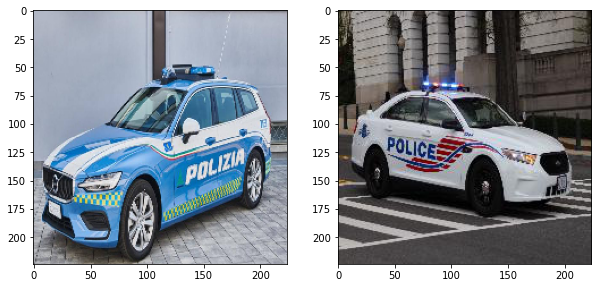

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(query_image)
plt.subplot(1,2,2)
plt.imshow(result)